# PCA for Image
Principal Component Analysis (PCA) is a useful technique for dimensionality reduction
and is optimal in the sense that it represents the variability of the training data with
as few dimensions as possible. Even a tiny 100 × 100 pixel grayscale image has 10,000
dimensions, and can be considered a point in a 10,000-dimensional space. A megapixel
image has dimensions in the millions.With such high dimensionality, it is no surprise
that dimensionality reduction comes in handy in many computer vision applications.
The projection matrix resulting from PCA can be seen as a change of coordinates to a
coordinate system where the coordinates are in descending order of importance.
To apply PCA on image data, the images need to be converted to a one-dimensional
vector representation using, for example, NumPy’s flatten() method.
The flattened images are collected in a single matrix by stacking them, one row for each
image. The rows are then centered relative to the mean image before the computation
of the dominant directions. To find the principal components, singular value decomposition
(SVD) is usually used, but if the dimensionality is high, there is a useful trick
that can be used instead since the SVD computation will be very slow in that case.

In [4]:
from PIL import Image
from numpy import *
def pca(X):
      """ Principal Component Analysis
       input: X, matrix with training data stored as flattened arrays in rows
       return: projection matrix (with important dimensions first), variance
       and mean."""
      # get dimensions
      num_data,dim = X.shape
      # center data
      mean_X = X.mean(axis=0)
      
      X = X - mean_X
      
      if dim>num_data:
         
         # PCA - compact trick used
         M = dot(X,X.T) # covariance matrix
         
         e,EV = linalg.eigh(M) # eigenvalues and eigenvectors
         
         tmp = dot(X.T,EV).T # this is the compact trick
         
         V = tmp[::-1] # reverse since last eigenvectors are the ones we want
         
         S = sqrt(e)[::-1] # reverse since eigenvalues are in increasing order
         
         for i in range(V.shape[1]):
           
             V[:,i] /= S
      
      else:
        # PCA - SVD used
        U,S,V = linalg.svd(X)
        
        V = V[:num_data] # only makes sense to return the first num_data
      
    # return the projection matrix, the variance and the mean
      return V,S,mean_X

This function first centers the data by subtracting the mean in each dimension. Then
the eigenvectors corresponding to the largest eigenvalues of the covariance matrix are
computed, either using a compact trick or using SVD. Here we used the function
range(), which takes an integer n and returns a list of integers 0 . . . (n − 1). Feel free to
use the alternative arange(), which gives an array, or xrange(), which gives a generator
(andmight give speed improvements).We will stick with range() throughout the book.
We switch from SVD to use a trick with computing eigenvectors of the (smaller)
covariance matrix XXT if the number of data points is less than the dimension of the
vectors. There are also ways of only computing the eigenvectors corresponding to the k
largest eigenvalues (k being the number of desired dimensions), making it even faster 

C:\Users\YOGENDER\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


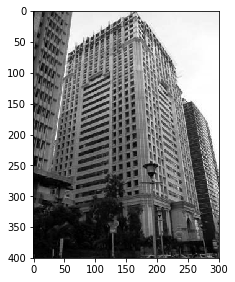

In [11]:
# from PIL import Image
from numpy import *
from pylab import *

im = array(Image.open('image.jpg')) # open one image to get size
m,n = im.shape[0:2] # get the size of the images
 # get the number of images
# create matrix to store all flattened images
immatrix = array([array(Image.open('image.jpg').convert('L')).flatten()],'f')

# perform PCA
V,S,immean = pca(immatrix)
# show some images (mean and 7 first modes)
figure(figsize=(20,10))
gray()
subplot(2,4,1)
imshow(immean.reshape(m,n))



In [6]:
immatrix.shape

(1, 120000)

# Using the Pickle Module

If you want to save some results or data for later use, the pickle module, which comes
with Python, is very useful. Pickle can take almost any Python object and convert it to
a string representation. This process is called pickling. Reconstructing the object from
the string representation is conversely called unpickling. This string representation can
then be easily stored or transmitted.

In [7]:
import pickle

# save mean and principal components
f = open('font_pca_modes.pkl', 'wb')
pickle.dump(immean,f)
pickle.dump(V,f)
f.close()

In [8]:
# load mean and principal components
f = open('font_pca_modes.pkl', 'rb')
immean = pickle.load(f)
V = pickle.load(f)
f.close()

 we will use the with statement to handle file reading
and writing. This is a construct that was introduced in Python 2.5 that automatically
handles opening and closing of files (even if errors occur while the files are open). Here
is what the saving and loading above looks like using with():
This might look strange the first time you see it, but it is a very useful construct. If you
don’t like it, just use the open and close functions as above.

In [9]:
#open file and save
with open('font_pca_modes.pkl', 'wb') as f:
     pickle.dump(immean,f)
     pickle.dump(V,f)

In [10]:
# open file and load
with open('font_pca_modes.pkl', 'rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)

As an alternative to using pickle, NumPy also has simple functions for reading andwriting
text files that can be useful if your data does not contain complicated structures, for
example a list of points clicked in an image. To save an array x to file, use:

In [ ]:
savetxt('test.txt',im,'%i')

X = loadtxt('test.txt')

# SciPy

## Blurring Images

In [1]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters
im = array(Image.open('image.jpg').convert('L'))
im2 = filters.gaussian_filter(im,5)

In [ ]:
# im = array(Image.open('image.jpg'))
im2 = zeros(im.shape)
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i], 5)
    im2 = uint8(im2)

In [4]:
im2 = array(im2,'uint8')

## Image Derivatives
How the image intensity changes over the image is important information and is used
for many applications. The intensity change is
described with the x and y derivatives Ix and Iy of the graylevel image I (for color
images, derivatives are usually taken for each color channel).

In [2]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters
im = array(Image.open('image.jpg').convert('L'))


# Sobel derivative filters
imx = zeros(im.shape)
filters.sobel(im,1,imx)
imy = zeros(im.shape)
filters.sobel(im,0,imy)
magnitude = sqrt(imx**2+imy**2)


sigma = 5 # standard deviation
imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)


array([[0.26386857, 0.25709468, 0.24375951, ..., 0.03343714, 0.03359916,
        0.03368703],
       [0.78315094, 0.76318609, 0.72389584, ..., 0.09831972, 0.09877566,
        0.09902321],
       [1.27796996, 1.24581332, 1.18257367, ..., 0.15741161, 0.15807399,
        0.15843467],
       ...,
       [0.39352359, 0.38132846, 0.35829894, ..., 0.85944733, 0.79239386,
        0.7592076 ],
       [0.23988467, 0.23244684, 0.2184027 , ..., 0.53230057, 0.49042041,
        0.46968829],
       [0.0805539 , 0.07805622, 0.07334034, ..., 0.17999937, 0.16575487,
        0.15870274]])

## Morphology—Counting Objects
Morphology (or mathematical morphology) is a framework and a collection of image
processing methods for measuring and analyzing basic shapes. Morphology is usually
applied to binary images but can be used with grayscale also. A binary image is an
image in which each pixel takes only two values, usually 0 and 1. Binary images are
often the result of thresholding an image, for example with the intention of counting
objects or measuring their size.

In [4]:
from scipy.ndimage import measurements,morphology
# load image and threshold to make sure it is binary
im = array(Image.open('image.jpg').convert('L'))
im = 1*(im<128)
labels, nbr_objects = measurements.label(im)
print ("Number of objects:", nbr_objects)

Number of objects: 572


This loads the image and makes sure it is binary by thresholding.Multiplying by 1 converts
the boolean array to a binary one. Then the function label() finds the individual
objects and assigns integer labels to pixels according to which object they belong to.
 The graylevel values indicate object index. As you
can see, there are small connections between some of the objects. Using an operation
called binary opening, we can remove them:

In [7]:
#morphology - opening to separate objects better
im_open = morphology.binary_opening(im,ones((9,5)),iterations=2)
labels_open, nbr_objects_open = measurements.label(im_open)
print( "Number of objects:", nbr_objects_open)

Number of objects: 6


The second argument of binary_opening() specifies the structuring element, an array
that indicates what neighbors to use when centered around a pixel. In this case, we
used 9 pixels (4 above, the pixel itself, and 4 below) in the y direction and 5 in the
x direction. You can specify any array as structuring element; the non-zero elements
will determine the neighbors. The parameter iterations determines how many times to
apply the operation. Try this and see how the number of objects changes. The image
after opening and the corresponding label image are shown in Figure 1-12c–d. As you
might expect, there is a function named binary_closing() that does the reverse

## Useful SciPy Modules

### Reading and writing .mat files
If you have some data, or find some interesting data set online, stored inMatlab’s .mat
file format, it is possible to read this using the scipy.io module.

In [ ]:
data = scipy.io.loadmat('test.mat')

### Saving arrays as images

In [ ]:
from scipy.misc import imsave
imsave('test.jpg',im)

#The scipy.misc module also contains the famous “Lena” test image:

lena = scipy.misc.lena()

#This will give you a 512 × 512 grayscale array version of the image.